In [105]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

In [106]:
df = pd.read_csv('./cleaned_data.csv')
df.head(5)

,Name,Manufacturer,Brand,Condition,Price,Warranty_type,Warranty_time,Architecture,Max_resolution,Base_clock,Boost_clock,Memory_clock,Memory_size,Memory_type,Bus_width,Bandwidth,Cores,Length,Width,Height,Bus_interface,TDP,OpenGL,DirectX
0,RX570 PowerColor,Powercolor,AMD,Đã qua sử dụng,600000,Không có bảo hành,0,GCN 4.0,4096x2160,1168,1250.0,1750,4.0,GDDR5,256,224.0,2048,255.0,137.0,47.0,PCIe 3.0 x16,150,4.6,12
1,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4500000,Bảo hành hãng,2,RDNA 2.0,7680x4320,2375,2620.0,2000,12.0,GDDR6,192,384.0,2560,247.0,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate
2,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4730000,Bảo hành hãng,12,RDNA 2.0,7680x4320,2375,2620.0,2000,12.0,GDDR6,192,384.0,2560,247.0,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate
3,ASRock RX 6800,Asrock,AMD,Đã qua sử dụng,6450000,Không có bảo hành,0,RDNA 2.0,7680x4320,1700,2105.0,2000,16.0,GDDR6,256,512.0,3840,267.0,120.0,40.0,PCIe 4.0 x16,250,4.6,12 Ultimate
4,MSI RX 6650 XT 8gb OC,Msi,AMD,Đã qua sử dụng,6000000,Bảo hành hãng,34,RDNA 2.0,4096x2160,2055,2694.0,2190,8.0,GDDR6,128,280.3,2048,277.0,130.0,51.0,PCIe 4.0 x8,176,4.6,12 Ultimate


In [107]:
df.dtypes

Name               object
Manufacturer       object
Brand              object
Condition          object
Price               int64
Warranty_type      object
Warranty_time       int64
Architecture       object
Max_resolution     object
Base_clock          int64
Boost_clock       float64
Memory_clock        int64
Memory_size       float64
Memory_type        object
Bus_width           int64
Bandwidth         float64
Cores               int64
Length            float64
Width             float64
Height            float64
Bus_interface      object
TDP                 int64
OpenGL            float64
DirectX            object
dtype: object

Xây dựng mô hình

Sau khi phân tích thăm dò, các biến số quan trọng ảnh hưởng đến giá của VGA là: Memory_size, Cores, Bandwidth, TDP, và length. Ngoài ra còn các biến phân loại quan trọng ảnh hưởng đến giá của VGA là: Manufacturer, Architecture, Max_resolution, Memory_type, Bus_interface, DirectX.
- Để xây dựng mô hình cần phải xử lý các biến phân loại thành dạng số

In [108]:
df_dummies = pd.get_dummies(df[['Manufacturer', 'Architecture','Max_resolution', 'Memory_type', 'Bus_interface', 'DirectX']])
df_dummies.head(5)


,Manufacturer_Asrock,Manufacturer_Asus,Manufacturer_Colorful,Manufacturer_Gigabyte,Manufacturer_Intel,Manufacturer_Leaktek,Manufacturer_Msi,Manufacturer_Nvidia,Manufacturer_Powercolor,Manufacturer_Sapphire,Manufacturer_Zotac,Architecture_Ada Lovelace,Architecture_Ampere,Architecture_Fermi,Architecture_Fermi 2.0,Architecture_GCN 1.0,Architecture_GCN 4.0,Architecture_Generation 12.7,Architecture_Kepler,Architecture_Kepler 2.0,Architecture_Maxwell,Architecture_Maxwell 2.0,Architecture_Pascal,Architecture_RDNA 1.0,Architecture_RDNA 2.0,Architecture_Turing,Max_resolution_1920x1080,Max_resolution_2048x1536,Max_resolution_2560x1600,Max_resolution_2560×1600,Max_resolution_3840x2160,Max_resolution_4096x2160,Max_resolution_5120x2880,Max_resolution_7680x4320,Memory_type_DDR4,Memory_type_GDDR3,Memory_type_GDDR5,Memory_type_GDDR6,Memory_type_GDDR6X,Bus_interface_PCIe 2.0 x16,Bus_interface_PCIe 3.0 x16,Bus_interface_PCIe 3.0 x4,Bus_interface_PCIe 4.0 x16,Bus_interface_PCIe 4.0 x4,Bus_interface_PCIe 4.0 x8,DirectX_12,DirectX_12 Ultimate
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True


In [109]:
df_numberical = df[['Memory_size', 'Cores', 'Bandwidth', 'TDP', 'Length']]
df_process = pd.concat([df_numberical,df_dummies],axis=1)
df_process.head(5)

,Memory_size,Cores,Bandwidth,TDP,Length,Manufacturer_Asrock,Manufacturer_Asus,Manufacturer_Colorful,Manufacturer_Gigabyte,Manufacturer_Intel,Manufacturer_Leaktek,Manufacturer_Msi,Manufacturer_Nvidia,Manufacturer_Powercolor,Manufacturer_Sapphire,Manufacturer_Zotac,Architecture_Ada Lovelace,Architecture_Ampere,Architecture_Fermi,Architecture_Fermi 2.0,Architecture_GCN 1.0,Architecture_GCN 4.0,Architecture_Generation 12.7,Architecture_Kepler,Architecture_Kepler 2.0,Architecture_Maxwell,Architecture_Maxwell 2.0,Architecture_Pascal,Architecture_RDNA 1.0,Architecture_RDNA 2.0,Architecture_Turing,Max_resolution_1920x1080,Max_resolution_2048x1536,Max_resolution_2560x1600,Max_resolution_2560×1600,Max_resolution_3840x2160,Max_resolution_4096x2160,Max_resolution_5120x2880,Max_resolution_7680x4320,Memory_type_DDR4,Memory_type_GDDR3,Memory_type_GDDR5,Memory_type_GDDR6,Memory_type_GDDR6X,Bus_interface_PCIe 2.0 x16,Bus_interface_PCIe 3.0 x16,Bus_interface_PCIe 3.0 x4,Bus_interface_PCIe 4.0 x16,Bus_interface_PCIe 4.0 x4,Bus_interface_PCIe 4.0 x8,DirectX_12,DirectX_12 Ultimate
0,4.0,2048,224.0,150,255.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
1,12.0,2560,384.0,230,247.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
2,12.0,2560,384.0,230,247.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
3,16.0,3840,512.0,250,267.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
4,8.0,2048,280.3,176,277.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True


- Chia bộ dữ liệu thành 2 tập train 80% và test 20%

In [110]:
from sklearn.model_selection import train_test_split
X = df_process
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Chuẩn hóa dữ liệu

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

- LinearRegression

In [112]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

In [113]:
LR.fit(X_train,y_train)

LinearRegression()

In [114]:
y_Pre = LR.predict(X_test)
y_Pre

array([ 3201795.14365132,  3749316.44269579, 24654485.43323456,
        6096153.84615382,  2784337.94583173,   274161.11299496,
        3891599.99999999,  6096153.84615382,  3445104.98948761,
        2784337.94583173,  6218173.8464945 ,  -885428.13454116,
        4556027.36987304,  6509191.40774462,  3121433.96347517,
        1882283.13293817,  6096153.84615382,   200000.00000007,
       11899964.43450883,  3716994.35548741,  4655475.52265555,
       12611135.25563488,  2784337.94583173])

In [115]:
y_test

81      5990000
4       6000000
40     21000000
69      6590000
10      1950000
45       999000
70      4199000
66      5999000
47      1500000
11      1850000
100     7790000
36      1000000
84      6290000
113    12500000
18      3990000
0        600000
72      6390000
26       400000
105     8690000
53      1950000
94      5090000
112    19389000
12      1800000
Name: Price, dtype: int64

- RandomForest

In [116]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

In [117]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
y_Pre_2 = RFR.predict(X_test)
y_Pre_2

array([ 5799880.        ,  4301223.33333333, 23642618.33333333,
        6092369.45634799,  2803780.        ,  1796380.        ,
        3869735.31440781,  6092369.45634799,  3221895.95238095,
        2803780.        ,  7694910.        ,  1002966.66666667,
        5749093.33333333,  7425782.94117647,  3074740.        ,
        2286546.66666667,  6092369.45634799,   383595.23809524,
        8124151.90476191,  3425089.4047619 ,  3531340.        ,
       13430440.        ,  2803780.        ])

In [119]:
y_test

81      5990000
4       6000000
40     21000000
69      6590000
10      1950000
45       999000
70      4199000
66      5999000
47      1500000
11      1850000
100     7790000
36      1000000
84      6290000
113    12500000
18      3990000
0        600000
72      6390000
26       400000
105     8690000
53      1950000
94      5090000
112    19389000
12      1800000
Name: Price, dtype: int64

Đánh giá mô hình

- Sử dụng trực quan để đánh giá mô hình

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

Linear Regression

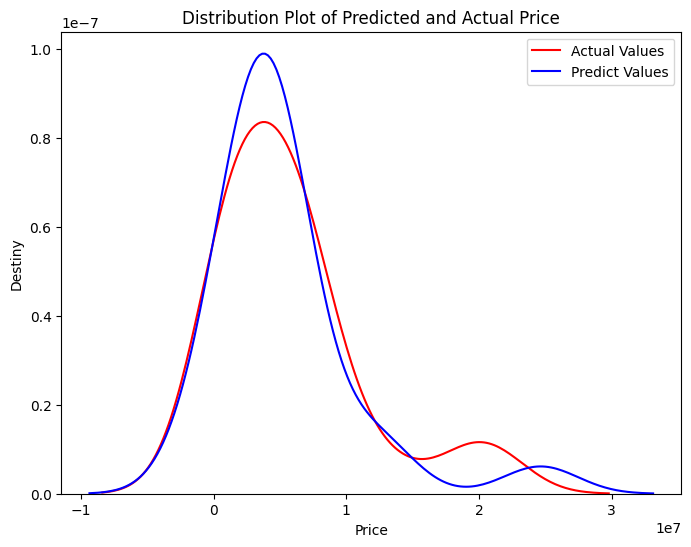

In [121]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color='red', label='Actual Values')
sns.kdeplot(y_Pre, color='blue', label = 'Predict Values')
plt.title('Distribution Plot of Predicted and Actual Price')
plt.xlabel('Price')
plt.ylabel('Destiny')
plt.legend()
plt.show()

RandomForest

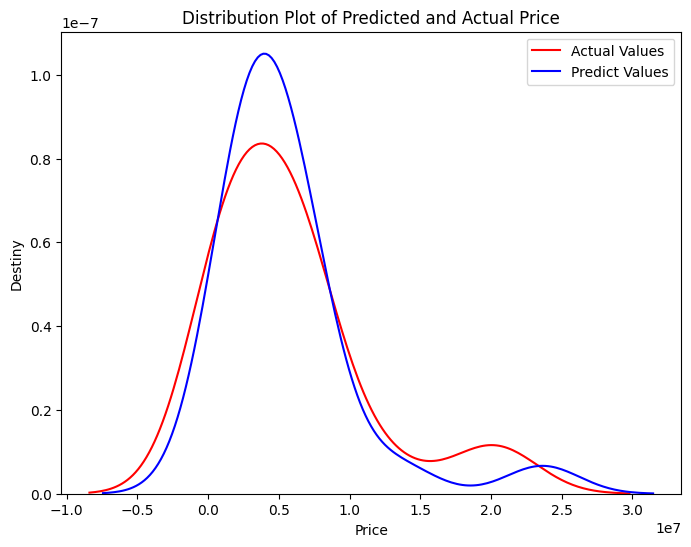

In [122]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color='red', label='Actual Values')
sns.kdeplot(y_Pre_2, color='blue', label = 'Predict Values')
plt.title('Distribution Plot of Predicted and Actual Price')
plt.xlabel('Price')
plt.ylabel('Destiny')
plt.legend()
plt.show()

Đối với mỗi mô hình, đường KDE cho giá trị dự đoán cho thấy mức độ phù hợp giữa dự đoán và giá trị thực tế. Trong biểu đồ của cả hai mô hình Linear Regression và RandomForest, đường dự đoán gần khớp với đường thực tế, điều đó cho thấy cả hai mô hình đều có khả năng phỏng đoán khá tốt. Để kết luận mô hình nào tốt hơn cần phải xem xét thêm các phân tích định lượng  như R-squared, Mean Squared Error

- Sử dụng hai thang đo Mean Squared Error (MSE) và R-squared (R^2) để đánh giá hai mô hình LinearRegression và RadomForest

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [124]:
def scoreModel(y_test, y_Pre):
  MSE = mean_squared_error(y_test, y_Pre)
  R2 = r2_score(y_test, y_Pre)
  print('MSE: ', MSE, '\n' + 'R2: ', R2, '\n')
  return MSE, R2

In [125]:
def result(X, y):
    y_Pre_LR = LR.predict(X)
    y_Pre_RFR = RFR.predict(X)
    score_LR = scoreModel(y, y_Pre_LR)
    score_RFR = scoreModel(y, y_Pre_RFR)
    table = pd.DataFrame([['LinearRegression'] + list(score_LR), ['RandomForestRegressor'] + list(score_RFR)], columns=['Model','MSE','R2'])
    return table

In [126]:
result(X_train,y_train)

MSE:  2544987686693.091 
R2:  0.9544165540091917 

MSE:  1871617869641.3223 
R2:  0.9664773261881344 



,Model,MSE,R2
0,LinearRegression,2.544988e+12,0.954417
1,RandomForestRegressor,1.871618e+12,0.966477


In [127]:
result(X_test,y_test)

MSE:  6103953396994.168 
R2:  0.788092672643712 

MSE:  3772494540993.371 
R2:  0.8690325460148897 



,Model,MSE,R2
0,LinearRegression,6.103953e+12,0.788093
1,RandomForestRegressor,3.772495e+12,0.869033


Có thể thấy trong hai mô hình thì mô hình RandomForest cho thấy hiệu suất tốt nhất với R2 cao hơn và MSE thấp hơn. Nên nhóm sẽ dùng mô hình này để chạy và in ra kết quả dự đoán giá VGA 

In [129]:
Predict1 = LR.predict(X_test)
Predict2 = RFR.predict(X_test)
result = pd.DataFrame( {'LinearRegression' : Predict1, 'RandomForestRegressor': Predict2, 'Price' : y_test})
result.to_csv('./predict.csv')